In [1]:
!pip install datasets
!pip install emoji
!pip install --upgrade transformers
!pip install streamlit
!pip install datasets transformers
!pip install wordcloud

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 70.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 65.0 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: transformers
    Fo

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re
from tqdm import tqdm
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import emoji
from collections import Counter
import string

try:
    nltk.data.find('corpora/wordnet')
    nltk.data.find('corpora/omw-1.4')
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('wordnet')
    nltk.download('omw-1.4')
    nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
!kaggle datasets download -d kazanova/sentiment140
!unzip -qq /content/sentiment140.zip -d /content/sentiment

Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
 98% 79.0M/80.9M [00:04<00:00, 24.2MB/s]
100% 80.9M/80.9M [00:04<00:00, 17.5MB/s]


In [4]:
# Load the Sentiment140 dataset
file_path = '/content/sentiment/training.1600000.processed.noemoticon.csv'  # Update with the actual path of your dataset
columns = ['target', 'id', 'date', 'flag', 'user', 'text']  # Column names as per the dataset description
df = pd.read_csv(file_path, encoding='ISO-8859-1', header=None, names=columns)

In [5]:
df.head()


,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [6]:
# Get the number of rows and columns in the dataset
print(f"Dataset shape: {df.shape}")

Dataset shape: (1600000, 6)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   id      1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [8]:
df.duplicated().sum()

0

#data cleaning and preprocessing

In [9]:

# Define a function to clean each tweet
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove user mentions (e.g., @username)
    text = re.sub(r'@\w+', '', text)

    # Remove hashtags
    text = re.sub(r'#\w+', '', text)

    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^A-Za-z\s]', '', text)

    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Apply the cleaning function to the 'text' column

df['cleaned_text'] = df['text'].apply(clean_text)
# inplace true


# Preview the cleaned text
df[['text', 'cleaned_text']].head()


,text,cleaned_text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",A thats a bummer You shoulda got David Carr of...
1,is upset that he can't update his Facebook by ...,is upset that he cant update his Facebook by t...
2,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball Managed to sav...
3,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i her...


In [10]:
# Convert the date column to datetime type
df['date'] = pd.to_datetime(df['date'], format='%a %b %d %H:%M:%S PDT %Y')
df['date'].head()

,date
0,2009-04-06 22:19:45
1,2009-04-06 22:19:49
2,2009-04-06 22:19:53
3,2009-04-06 22:19:57
4,2009-04-06 22:19:57


In [11]:

# Convert target to more readable format (0 = Negative, 4 = Positive)
sentiment_mapping = {0: 'Negative', 4: 'Positive'}  # Create a mapping dictionary
df['sentiment'] = df['target'].map(sentiment_mapping)

# Verification (Optional but highly recommended):
print(df['sentiment'].value_counts())  # Check the distribution of sentiments



sentiment
Negative    800000
Positive    800000
Name: count, dtype: int64


*italicized text*
#EDA
> Add blockquote



In [12]:
#What is the total number of tweets in the dataset?


total_tweets = len(df)
print(f"Total number of tweets: {total_tweets}")

Total number of tweets: 1600000


In [13]:
#What is the total number of tweets in the dataset?

start_date = df['date'].min()
end_date = df['date'].max()
print(f"Date range: {start_date} to {end_date}")

Date range: 2009-04-06 22:19:45 to 2009-06-25 10:28:31


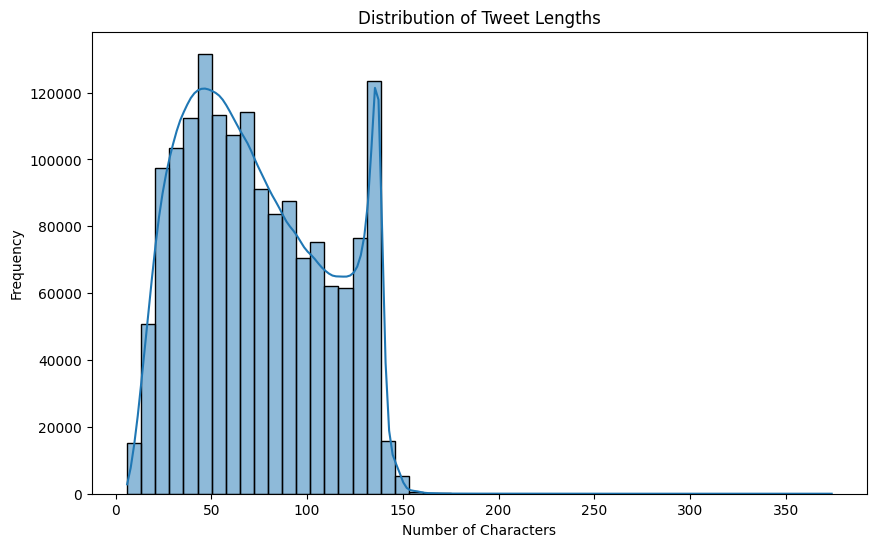

Average tweet length: 74.09 characters
Median tweet length: 69.00 characters


In [14]:
#What is the distribution of tweet lengths?
df['tweet_length'] = df['text'].str.len()  # Use 'text' column for tweet lengths

plt.figure(figsize=(10, 6))
sns.histplot(df['tweet_length'], bins=50, kde=True) # Use seaborn for a slightly nicer plot
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()

print(f"Average tweet length: {df['tweet_length'].mean():.2f} characters")
print(f"Median tweet length: {df['tweet_length'].median():.2f} characters") # Median is often useful too


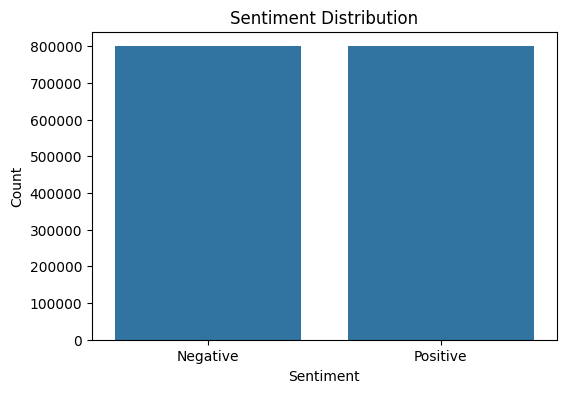

In [15]:
# Visualize the sentiment label distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top  most common words:
[('Im', 110395), ('day', 78909), ('get', 77352), ('like', 75521), ('good', 71064), ('go', 68828), ('im', 65712), ('today', 60362), ('dont', 60187), ('work', 60073)]


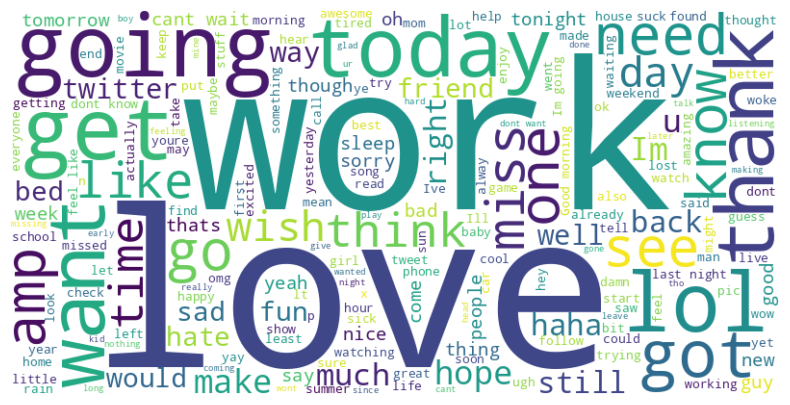

In [16]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Define a function to get top words
def get_top_words(text_series, n=10):
    words = ' '.join(text_series).split()
    words = [word for word in words if word.lower() not in stop_words]  # Removing stopwords and making words lowercase
    return Counter(words).most_common(n)

# Get top  most common words
top_words = get_top_words(df['cleaned_text'])
print("Top  most common words:")
print(top_words)

# Generate a word cloud
def generate_wordcloud(text_series):
    # Combine all text into a single string
    all_text = ' '.join(text_series)

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words, max_words=200).generate(all_text)

    # Plot the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Hide the axis
    plt.show()

# Generate and display the word cloud for the cleaned text
generate_wordcloud(df['cleaned_text'])


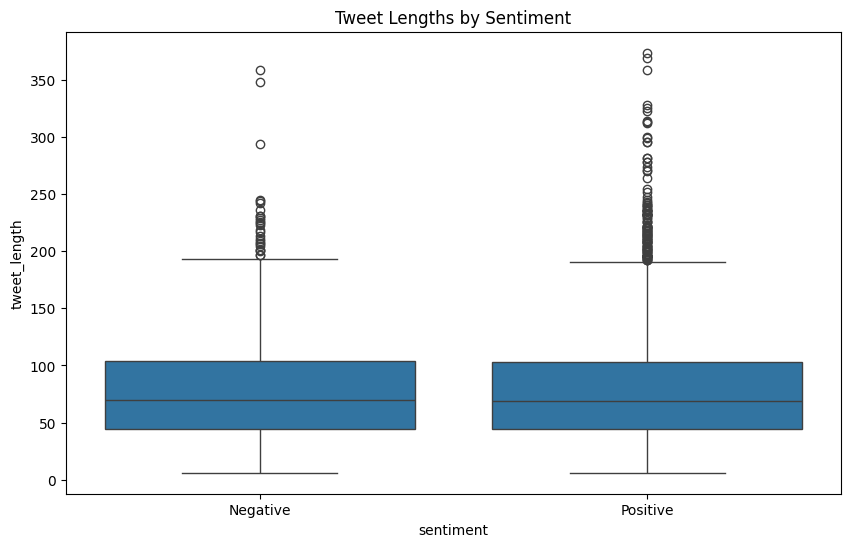


Tweet Length Statistics:
              count       mean        std  min   25%   50%    75%    max
sentiment                                                               
Negative   800000.0  74.301790  36.743260  6.0  44.0  70.0  104.0  359.0
Positive   800000.0  73.878433  36.135274  6.0  44.0  69.0  103.0  374.0


In [17]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='sentiment', y='tweet_length', data=df)
plt.title('Tweet Lengths by Sentiment')
plt.show()

print("\nTweet Length Statistics:")
print(df.groupby('sentiment')['tweet_length'].describe())

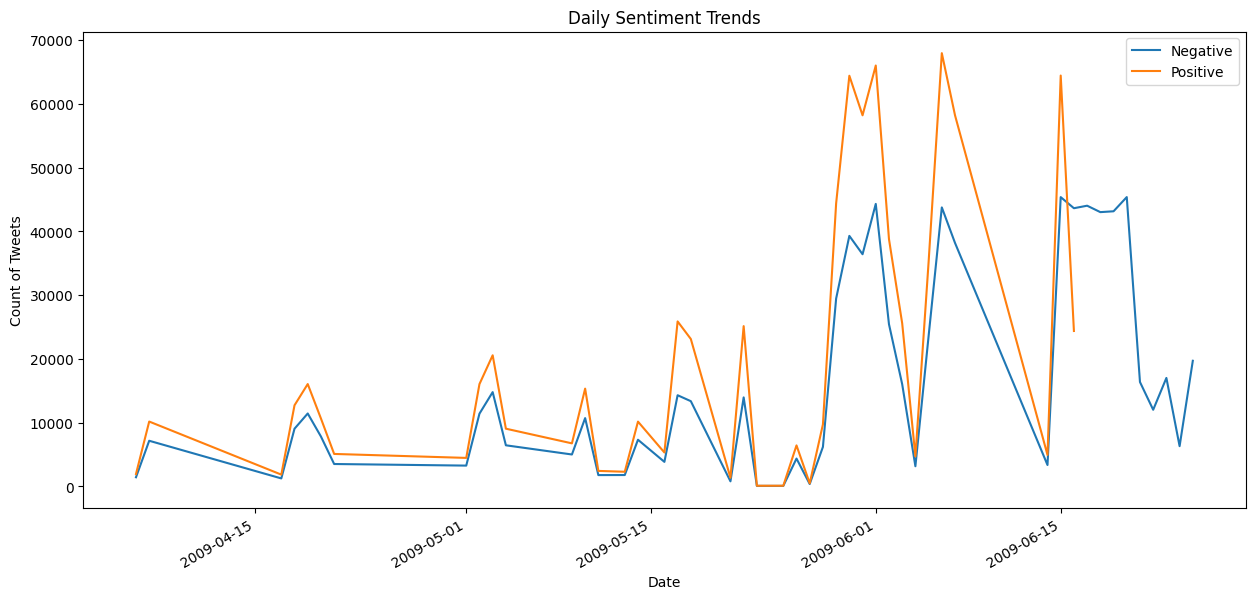

In [18]:
#df = df.reset_index()  # This will move 'date' from index to a regular column

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')
""
# Drop rows with invalid dates
df = df.dropna(subset=['date'])

# Set date as index
df.set_index('date', inplace=True)

# Resample by day and calculate sentiment counts (unstack separates the counts for positive/negative)
daily_sentiment = df.groupby([pd.Grouper(freq='D'), 'sentiment'])['sentiment'].count().unstack()

# Plot sentiment trends over time
plt.figure(figsize=(15, 7))
daily_sentiment.plot(ax=plt.gca())  # Plot negative and positive trends
plt.title('Daily Sentiment Trends')
plt.xlabel('Date')
plt.ylabel('Count of Tweets')
plt.legend(['Negative', 'Positive'])
plt.show()


#Modiling

In [19]:
data=df[['cleaned_text','target']]
data.head()


,cleaned_text,target
date,,
2009-04-06 22:19:45,A thats a bummer You shoulda got David Carr of...,0
2009-04-06 22:19:49,is upset that he cant update his Facebook by t...,0
2009-04-06 22:19:53,I dived many times for the ball Managed to sav...,0
2009-04-06 22:19:57,my whole body feels itchy and like its on fire,0
2009-04-06 22:19:57,no its not behaving at all im mad why am i her...,0


In [20]:
data['target'] = data['target'].replace(4,1)
data['target'].value_counts()

<ipython-input-20-3125ce2907dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = data['target'].replace(4,1)


,count
target,
0,800000
1,800000


In [21]:
data_pos = data[data['target'] == 1]
data_pos.head()

,cleaned_text,target
date,,
2009-04-06 22:22:45,I LOVE u guys r the best,1
2009-04-06 22:22:45,im meeting up with one of my besties tonight C...,1
2009-04-06 22:22:46,Thanks for the Twitter add Sunisa I got to mee...,1
2009-04-06 22:22:46,Being sick can be really cheap when it hurts t...,1
2009-04-06 22:22:46,he has that effect on everyone,1


In [44]:
data_neg = data[data['target'] == 0]
data_neg.head()

,cleaned_text,target
date,,
2009-04-06 22:19:45,A thats a bummer You shoulda got David Carr of...,0
2009-04-06 22:19:49,is upset that he cant update his Facebook by t...,0
2009-04-06 22:19:53,I dived many times for the ball Managed to sav...,0
2009-04-06 22:19:57,my whole body feels itchy and like its on fire,0
2009-04-06 22:19:57,no its not behaving at all im mad why am i her...,0


In [23]:
import numpy as np
data_pos = data_pos.sample(100000)
data_neg = data_neg.sample(100000)
dataset = pd.concat([data_pos, data_neg])
dataset = dataset.iloc[np.random.permutation(len(dataset))]
dataset=dataset.reset_index(drop=True)
dataset.head()

,cleaned_text,target
0,CANT WAIT FOR AD less than an hourlt,1
1,Youll be pleased to know I found a PDF Ref Sum...,0
2,Yes then the world will finally know what is g...,1
3,ha Im sure Ive been subscribed to the newslett...,1
4,Crawfish boil with my boy at my Mommas Hopeful...,1


In [24]:
df.head()

,target,id,flag,user,text,cleaned_text,sentiment,tweet_length
date,,,,,,,,
2009-04-06 22:19:45,0,1467810369,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",A thats a bummer You shoulda got David Carr of...,Negative,115
2009-04-06 22:19:49,0,1467810672,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he cant update his Facebook by t...,Negative,111
2009-04-06 22:19:53,0,1467810917,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball Managed to sav...,Negative,89
2009-04-06 22:19:57,0,1467811184,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,Negative,47
2009-04-06 22:19:57,0,1467811193,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i her...,Negative,111


In [25]:
X=list(dataset['cleaned_text'])
X[:5]

['CANT WAIT FOR AD less than an hourlt',
 'Youll be pleased to know I found a PDF Ref Summary for to go on the eBook Reader Doesnt zoom quite how Id like',
 'Yes then the world will finally know what is going on withing the Scottish network',
 'ha Im sure Ive been subscribed to the newsletter for some time but really interested in your latest pub on Twitter',
 'Crawfish boil with my boy at my Mommas Hopefully a little fishing too Then Dan amp Ashleys later tonight Today is going to be a good day']

In [26]:
y=list(dataset['target'])
y[:5]

[1, 0, 1, 1, 1]

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42,)
X_train[:5]

['its totally goofy but id love to spread it around to the jonas fans',
 'got it im about to twitpic monday being adorbs',
 'really want to go home now hour days are not fun',
 'cant sign up for your run alerts Boston says registration is closed',
 'Havent yet gotten out of bed brought me breakfast in bed and I decided to stay here']

In [28]:
from transformers import DistilBertTokenizerFast
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [29]:
train_encodings = tokenizer(X_train, truncation=True, padding=True)
test_encodings = tokenizer(X_test, truncation=True, padding=True)


In [30]:
y_train[:5]


[1, 1, 0, 0, 1]

In [31]:
import tensorflow as tf

train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    y_train
))

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    y_test
))

In [32]:
from transformers import TFDistilBertForSequenceClassification, Trainer, TFTrainingArguments

training_args = TFTrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=2,              # total number of training epochs
    per_device_train_batch_size=64,  # batch size per device during training
    per_device_eval_batch_size=64,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.1,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=100,
)

In [33]:
import tensorflow as tf
from datasets import Dataset
from transformers import DistilBertForSequenceClassification, Trainer, TrainingArguments

# Convert TensorFlow datasets to Hugging Face Datasets
# Use Dataset.from_dict with correct format.  The keys should correspond to the column names and the values are lists of the column values.
train_dataset = Dataset.from_dict({
    "input_ids": train_encodings["input_ids"],
    "attention_mask": train_encodings["attention_mask"],
    "label": y_train
})

test_dataset = Dataset.from_dict({
    "input_ids": test_encodings["input_ids"],
    "attention_mask": test_encodings["attention_mask"],
    "label": y_test
})

# Ensure you are using the PyTorch version of the model
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased")

# Use the TrainingArguments class for PyTorch
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=2,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.1,
    logging_dir='./logs',
    logging_steps=100,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

trainer.train()

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
100,0.659400
200,0.498700
300,0.458300
400,0.443300
500,0.437800
600,0.432500
700,0.429000
800,0.434800
900,0.415500
1000,0.409500


KeyboardInterrupt: 

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,trainer.predict(test_dataset)[1]))

Step,Training Loss
100,0.659400
200,0.498700
300,0.458300
400,0.443300
500,0.437800
600,0.432500
700,0.429000
800,0.434800
900,0.415500
1000,0.409500


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19887
           1       1.00      1.00      1.00     20113

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg       1.00      1.00      1.00     40000



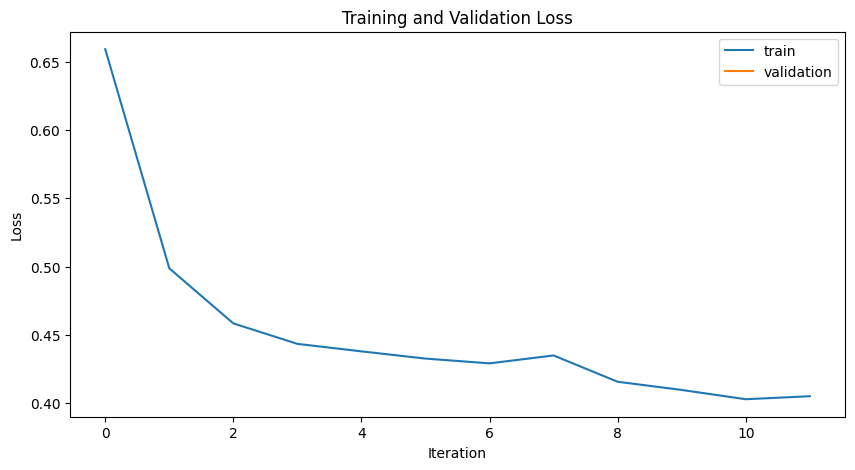

In [35]:
history = trainer.state.log_history

train_loss = [x['loss'] for x in history if 'loss' in x]
eval_loss = [x['eval_loss'] for x in history if 'eval_loss' in x]

plt.figure(figsize=(10,5))
plt.plot(train_loss, label='train')
plt.plot(eval_loss, label='validation')
plt.title('Training and Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()

#streamlit

In [36]:
import streamlit as st
from transformers import DistilBertTokenizerFast, TFDistilBertForSequenceClassification
import tensorflow as tf

# Function to load the model and tokenizer
def load_model_and_tokenizer():
    """Loads the DistilBERT model and tokenizer"""
    model_name = "distilbert-base-uncased"
    tokenizer = DistilBertTokenizerFast.from_pretrained(model_name)
    model = TFDistilBertForSequenceClassification.from_pretrained(model_name)
    return model, tokenizer

# Load the model and tokenizer
model, tokenizer = load_model_and_tokenizer()

# Streamlit interface for user inputs
st.title('Text Classification with DistilBERT')

# Text input from the user
user_input = st.text_area("Enter the text to classify")

if user_input:
    # Tokenize the input
    inputs = tokenizer(user_input, return_tensors="tf", truncation=True, padding=True)

    # Make predictions
    outputs = model(inputs)
    predictions = tf.argmax(outputs.logits, axis=-1)

    # Display prediction results
    st.write(f"Predicted class: {predictions.numpy()[0]}")

# Function to prepare training and testing datasets
def prepare_data(train_encodings, test_encodings, y_train, y_test):
    train_dataset = tf.data.Dataset.from_tensor_slices((
        dict(train_encodings),
        y_train
    ))

    test_dataset = tf.data.Dataset.from_tensor_slices((
        dict(test_encodings),
        y_test
    ))

    return train_dataset, test_dataset

# Example of training the model
def train_model(train_dataset, test_dataset):
    optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    metrics = [tf.metrics.SparseCategoricalAccuracy()]

    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

    # Train the model
    model.fit(train_dataset.batch(16), validation_data=test_dataset.batch(16), epochs=3)

# Example: Training the model (you would need the actual encodings and labels for this)
# train_encodings, test_encodings, y_train, y_test = ...
# train_dataset, test_dataset = prepare_data(train_encodings, test_encodings, y_train, y_test)
# train_model(train_dataset, test_dataset)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [37]:
#local tunnel
!npm install localtunnel
!pip install streamlit-drawable-canvas




added 22 packages, and audited 23 packages in 2s

3 packages are looking for funding
  run `npm fund` for details

2 moderate severity vulnerabilities

To address all issues, run:
  npm audit fix

Run `npm audit` for details.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 56.7 MB/s eta 0:00:00


In [38]:
#password local tunnel
import urllib
print("Password/Enpoint IP for localtunnel is:",urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))



Password/Enpoint IP for localtunnel is: 34.87.185.171


In [ ]:
!streamlit run zoz.py &>/content/logs.txt &
!npx localtunnel --port 8501

your url is: https://curly-dryers-report.loca.lt


In [46]:
%%writefile zoz.py

import streamlit as st
from transformers import DistilBertTokenizerFast, TFDistilBertForSequenceClassification
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Sentiment140 dataset
file_path = '/content/sentiment/training.1600000.processed.noemoticon.csv'  # Update with the actual path of your dataset
columns = ['target', 'id', 'date', 'flag', 'user', 'text']  # Column names as per the dataset description
df = pd.read_csv(file_path, encoding='ISO-8859-1', header=None, names=columns)

# Function to load the model and tokenizer
def load_model_and_tokenizer():
    """Loads the DistilBERT model and tokenizer."""
    model_name = "distilbert-base-uncased"
    tokenizer = DistilBertTokenizerFast.from_pretrained(model_name)
    model = TFDistilBertForSequenceClassification.from_pretrained(model_name)
    return model, tokenizer

# Load the model and tokenizer
model, tokenizer = load_model_and_tokenizer()

# Function to predict sentiment
def predict_sentiment(text, model, tokenizer):
    """Predicts the sentiment of the given text."""
    inputs = tokenizer(text, return_tensors="tf")
    outputs = model(**inputs)
    predicted_class = tf.math.argmax(outputs.logits, axis=-1).numpy()[0]
    sentiment_labels = ["Positive", "Negative"]  # Replace with your actual labels
    return sentiment_labels[predicted_class]

# Add a sidebar for page navigation
page = st.sidebar.selectbox("Choose a page", ["Sentiment Analysis", "EDA"])

# Page 1: Sentiment Analysis
if page == "Sentiment Analysis":
    st.title("Tweet Sentiment Analyzer")

    # Input text area
    text_input = st.text_area("Enter a tweet:")

    if st.button("Analyze"):
        sentiment = predict_sentiment(text_input, model, tokenizer)
        st.write(f"Sentiment: {sentiment}")

# Page 2: EDA (Exploratory Data Analysis)
elif page == "EDA":
    st.title("Exploratory Data Analysis")

    # Map the sentiment labels
    df['sentiment'] = df['target'].map({0: 'Negative', 4: 'Positive'})

    # 1. Sentiment Distribution
    st.write("Sentiment Distribution:")
    fig_sentiment_dist, ax_sentiment_dist = plt.subplots()
    sns.countplot(x='sentiment', data=df, ax=ax_sentiment_dist)
    ax_sentiment_dist.set_title('Sentiment Distribution')
    st.pyplot(fig_sentiment_dist)

    # 2. Tweet Length Distribution
    st.write("Tweet Length Distribution:")
    df['text_length'] = df['text'].apply(len)

    fig_length_dist, ax_length_dist = plt.subplots()
    sns.histplot(df['text_length'], bins=50, kde=True, ax=ax_length_dist)
    ax_length_dist.set_title('Distribution of Tweet Lengths')
    st.pyplot(fig_length_dist)

    # 3. Tweet Length by Sentiment
    st.write("Tweet Lengths by Sentiment:")
    fig_length_sentiment, ax_length_sentiment = plt.subplots()
    sns.boxplot(x='sentiment', y='text_length', data=df, ax=ax_length_sentiment)
    ax_length_sentiment.set_title('Tweet Lengths by Sentiment')
    st.pyplot(fig_length_sentiment)

    # # 4. Daily Sentiment Trends
    # st.write("Daily Sentiment Trends:")

    # # Convert 'date' column to datetime
    # df['date'] = pd.to_datetime(df['date'], errors='coerce')
    # # Drop rows with invalid dates
    # df = df.dropna(subset=['date'])

    # # Set date as index
    # df.set_index('date', inplace=True)

    # # Resample by day and calculate sentiment counts (unstack separates the counts for positive/negative)
    # daily_sentiment = df.groupby([pd.Grouper(freq='D'), 'sentiment'])['sentiment'].count().unstack()

    # # Resample by day and calculate sentiment counts (positive and negative)
    # daily_sentiment = df.groupby([pd.Grouper(freq='D'), 'sentiment'])['sentiment'].count().unstack()

    # # Plot sentiment trends over time
    # fig_daily, ax_daily = plt.subplots(figsize=(15, 7))
    # daily_sentiment.plot(ax=ax_daily)  # Plot negative and positive trends
    # ax_daily.set_title('Daily Sentiment Trends')
    # ax_daily.set_xlabel('Date')
    # ax_daily.set_ylabel('Count of Tweets')
    # ax_daily.legend(['Negative', 'Positive'])
    # st.pyplot(fig_daily)


Overwriting zoz.py
